<a href="https://colab.research.google.com/github/Maisha-Chowdhury/CSE425-PROJECT/blob/main/Copy_of_MaishaChowdhury_CSE425Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from project outline
import torch
import torch . nn as nn
import torch . optim as optim
from torch . utils . data import DataLoader, TensorDataset
import torchvision . transforms as transforms
import torchvision . datasets as datasets


In [2]:
!pip install -q sentence-transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.6 MB/s eta 0:00:00


In [3]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/fancyzhx/ag_news/" + splits["train"]) #ignoring the warning

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
import nltk
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = word_tokenize(text.lower())
    filtered = [word for word in words if word.isalnum() and word not in stop_words]
    return " ".join(filtered)


df['clean_text'] = df['text'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
df = df.drop(columns=["label"])
df.head()

,text,clean_text
0,Wall St. Bears Claw Back Into the Black (Reute...,wall bears claw back black reuters reuters wal...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stocks outlook reuters reute...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halts oil exports main southern pipeline ...
4,"Oil prices soar to all-time record, posing new...",oil prices soar record posing new menace us ec...


In [6]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
#model = SentenceTransformer('all-mpnet-base-v2')   #took more time, no differance in performance
texts = df['clean_text'].tolist()

embeddings = model.encode(texts, show_progress_bar=True)    #using gpu makes it faster

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pickle

with open('/content/drive/MyDrive/embeddings.pkl', 'wb') as drive_file:
    pickle.dump(embeddings, drive_file)

Mounted at /content/drive


In [8]:
import numpy as np

with open('/content/drive/MyDrive/embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)

# Defining my Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 128),
            nn.GELU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.GELU(),
            nn.Linear(64, 32),
            nn.GELU(),
            nn.Linear(32, 16),
            nn.GELU(),
            nn.Linear(16, 8),   #going lower than 8 worsens the clustering

        )

        self.decoder = nn.Sequential(

            nn.Linear(8,16),
            nn.GELU(),
            nn.Linear(16,32),
            nn.GELU(),
            nn.Linear(32, 64),
            nn.GELU(),
            nn.Linear(64, 128),
            nn.GELU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def get_latent(self, x):
        return self.encoder(x)


input_dim = embeddings.shape[1]
print("Input dimentions: ",input_dim)
autoencoder = Autoencoder(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

dataset = TensorDataset(embeddings_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)


epochs = 15
autoencoder.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in loader:
        x = batch[0]
        optimizer.zero_grad()
        output = autoencoder(x)
        loss = criterion(output, x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")


autoencoder.eval()
with torch.no_grad():
    latent_embeddings = autoencoder.get_latent(embeddings_tensor).numpy()


with open('/content/drive/MyDrive/latent_embeddings2.pkl', 'wb') as file:
    pickle.dump(latent_embeddings, file)

print("Latent embeddings saved to Drive.")


Input dimentions:  384
Epoch 1/15 - Loss: 4.5568
Epoch 2/15 - Loss: 4.4152
Epoch 3/15 - Loss: 3.8314
Epoch 4/15 - Loss: 3.6429
Epoch 5/15 - Loss: 3.5566
Epoch 6/15 - Loss: 3.5000
Epoch 7/15 - Loss: 3.4658
Epoch 8/15 - Loss: 3.4401
Epoch 9/15 - Loss: 3.4222
Epoch 10/15 - Loss: 3.4047
Epoch 11/15 - Loss: 3.3862
Epoch 12/15 - Loss: 3.3644
Epoch 13/15 - Loss: 3.3426
Epoch 14/15 - Loss: 3.3252
Epoch 15/15 - Loss: 3.3092
Latent embeddings saved to Drive.


In [9]:
import pickle

with open('/content/drive/MyDrive/latent_embeddings2.pkl', 'rb') as file:
    latent_embeddings = pickle.load(file)


In [10]:
from sklearn.cluster import KMeans

k = 4  # 4 clusters because 4 classes
kmeans = KMeans(n_clusters=k, random_state=60)
kmeans_labels = kmeans.fit_predict(latent_embeddings)

df['kmeans_labels'] = kmeans_labels
#DBSCAN gave same label for all
#Hierarchical Clustering crashes session after using all the ram

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
sil_score = silhouette_score(latent_embeddings, kmeans_labels)
ch_score = calinski_harabasz_score(latent_embeddings, kmeans_labels)
db_score = davies_bouldin_score(latent_embeddings, kmeans_labels)

print(f"Silhouette Score:         {sil_score:.4f}")
print(f"Calinski-Harabasz Score:  {ch_score:.4f}")
print(f"Davies-Bouldin Index:     {db_score:.4f}")

Silhouette Score:         0.2385
Calinski-Harabasz Score:  56620.2305
Davies-Bouldin Index:     1.3385


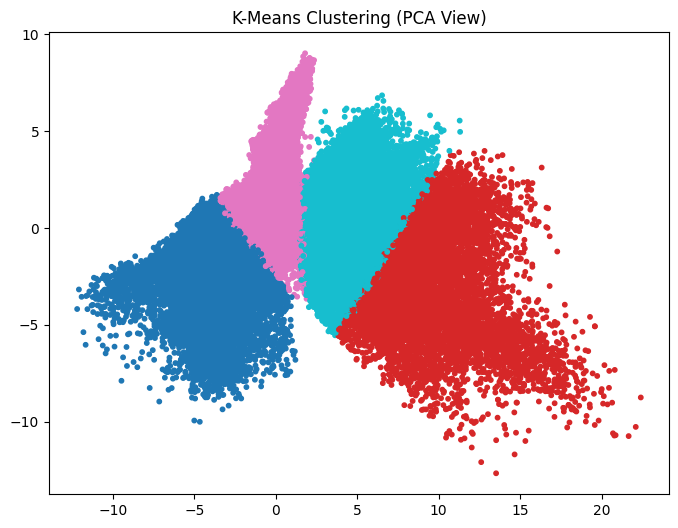

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(latent_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['kmeans_labels'], cmap='tab10', s=10)
plt.title("K-Means Clustering (PCA View)")
plt.show()


Self Organizing Map(SOM):

In [13]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=7bc6f8672f5dbc5a1461c80654bb005269895a767ac80b01b05fa750b41e2be8
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [14]:

with open('/content/drive/MyDrive/embeddings.pkl', 'rb') as drive_file:
    embeddings = pickle.load(drive_file)


from minisom import MiniSom
import numpy as np


embeddings = np.array(embeddings)


som = MiniSom(x=2, y=2, input_len=embeddings.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(embeddings)
som.train_random(data=embeddings, num_iteration=1000)


cluster_assignments = []
for emb in embeddings:
    x, y = som.winner(emb)
    cluster_id = x * 2 + y
    cluster_assignments.append(cluster_id)



In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_score = silhouette_score(embeddings, cluster_assignments)
ch_score = calinski_harabasz_score(embeddings, cluster_assignments)
db_score = davies_bouldin_score(embeddings, cluster_assignments)

print(f"Silhouette Score:        {sil_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.4f}")
print(f"Davies-Bouldin Index:    {db_score:.4f}")

Silhouette Score:        0.0173
Calinski-Harabasz Index: 1960.7567
Davies-Bouldin Index:    5.5817


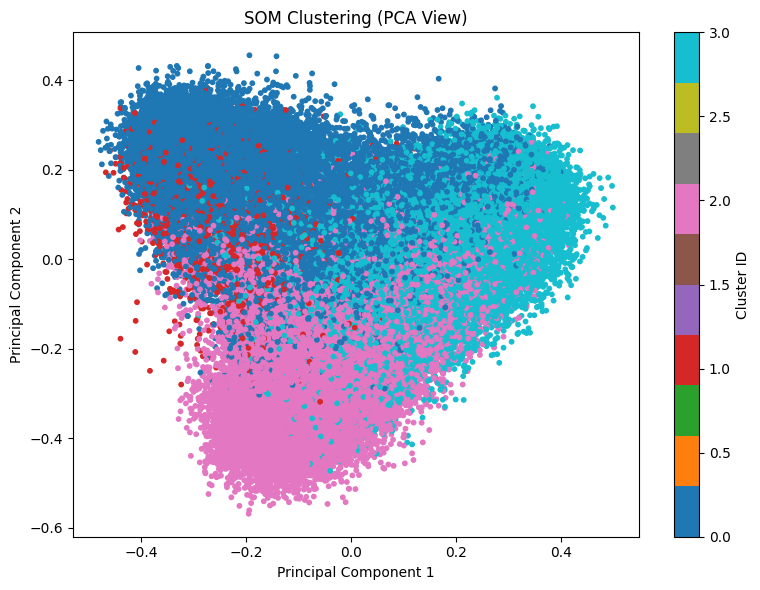

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)


cluster_assignments = np.array(cluster_assignments)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=cluster_assignments, cmap='tab10', s=10)
plt.title("SOM Clustering (PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster ID')
plt.tight_layout()
plt.show()
